<a href="https://colab.research.google.com/github/samara22vazquez/Machine-Learning-Templates/blob/master/Earthquake_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_data = pd.read_csv("train_values.csv")
label_data = pd.read_csv("train_labels.csv")
test_data = pd.read_csv("test_values.csv")
train_data.sort_values(by=['building_id'], inplace=True, ignore_index=True)
label_data.sort_values(by=['building_id'], inplace=True, ignore_index=True)
train_data = train_data.join(label_data['damage_grade'])
train_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,4,30,266,1224,1,25,5,2,t,r,...,0,0,0,0,0,0,0,0,0,2
1,8,17,409,12182,2,0,13,7,t,r,...,0,0,0,0,0,0,0,0,0,3
2,12,17,716,7056,2,5,12,6,o,r,...,0,0,0,0,0,0,0,0,0,3
3,16,4,651,105,2,80,5,4,n,r,...,0,0,0,0,0,0,0,0,0,2
4,17,3,1387,3909,5,40,5,10,t,r,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
categorical_data = train_data.select_dtypes('object')
train_data = train_data.drop(train_data.select_dtypes('object'), axis=1)
train_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,4,30,266,1224,1,25,5,2,0,1,...,0,0,0,0,0,0,0,0,0,2
1,8,17,409,12182,2,0,13,7,0,1,...,0,0,0,0,0,0,0,0,0,3
2,12,17,716,7056,2,5,12,6,0,1,...,0,0,0,0,0,0,0,0,0,3
3,16,4,651,105,2,80,5,4,0,1,...,0,0,0,0,0,0,0,0,0,2
4,17,3,1387,3909,5,40,5,10,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
import category_encoders as ce
ce_target = ce.target_encoder.TargetEncoder(cols = ['land_surface_condition', 'roof_type', 'foundation_type', 'position', 'plan_configuration', 'ground_floor_type', 'other_floor_type', 'legal_ownership_status'], return_df=True)
ce_target.fit(categorical_data,train_data['damage_grade'].values)
cat_data_encoded = ce_target.transform(categorical_data,train_data['damage_grade'].values)
train_data = train_data.join(cat_data_encoded)
train_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_other,damage_grade,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
0,4,30,266,1224,1,25,5,2,0,1,...,0,2,2.234170,2.329573,2.269637,2.309104,2.042893,2.229131,2.243646,2.244063
1,8,17,409,12182,2,0,13,7,0,1,...,0,3,2.234170,2.329573,2.269637,2.309104,2.315751,2.229131,2.243646,2.244063
2,12,17,716,7056,2,5,12,6,0,1,...,0,3,2.289081,2.329573,2.320173,2.309104,2.315751,2.229131,2.243646,2.244063
3,16,4,651,105,2,80,5,4,0,1,...,0,2,2.251407,2.329573,2.269637,2.309104,2.315751,2.229131,2.243646,2.244063
4,17,3,1387,3909,5,40,5,10,0,0,...,0,2,2.234170,2.329573,2.269637,2.309104,2.315751,2.207458,2.243646,2.244063


148259 87218 25124
25124


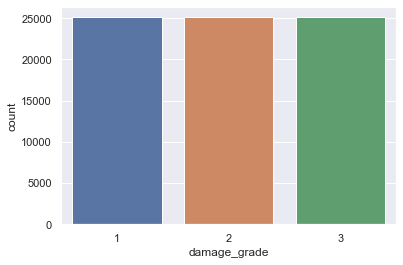

In [ ]:
damage_1, damage_2,damage_3 = label_data.damage_grade.value_counts()
print(damage_1, damage_2, damage_3)

train_3=train_data[train_data['damage_grade'] == 3]
train_2=train_data[train_data['damage_grade'] == 2]
train_1=train_data[train_data['damage_grade'] == 1]
print(len(train_1))
train_3=train_3.sample(damage_3-1)
train_2=train_2.sample(damage_3-1)
train_1=train_1.sample(damage_3-1)


train_data = pd.concat([train_3, train_2,train_1], ignore_index=True, sort =False)
train_data=train_data.sample(frac=1)
train_data.sort_values(by=['building_id'], inplace=True)
train_data.head(5)

sns.set(style="darkgrid")
ax = sns.countplot(x="damage_grade", data=train_data)

In [ ]:
geo_levels =(train_data['geo_level_1_id'])
geo_levels = geo_levels.astype(str)
no_of_unique_cat  = geo_levels.nunique()
print(no_of_unique_cat)
embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
embedding_size = int(embedding_size)
print(embedding_size)
vocab  = no_of_unique_cat+1
model = tf.keras.models.Sequential(
tf.keras.layers.Embedding(vocab ,embedding_size, input_length = 1 ),
tf.keras.layers.Reshape(target_shape=(embedding_size,))
)

# models = Model(concatenate([models[0].output, models[1].output,models[2].output]))


31
16


In [ ]:
class EmbeddingSexyInputLayer(tf.keras.layers.Layer):
    def __init__(self, vocabulary_size, embedding_size, **kwargs):
    # frame_embedding_dim, tagset_size, role_embedding_size,dep_size,
        super().__init__(**kwargs)

        self.geo_1_embedds = layers.Embedding(
            input_dim=vocabulary_size,
            output_dim=embedding_size
        )

    def call(self, geo_level_1, rest_of_data):
        embeds =  self.geo_1_embedds(geo_level_1)
        return [geo_1_embeds, rest_of_data]

In [ ]:
def get_compiled_model():
    model = tf.keras.Sequential([    
        tf.keras.layers.Input(shape=40),
        EmbeddingSexyInputLayer()
        # tf.keras.layers.Input(shape=train_data.shape)  ,   
        tf.keras.layers.Dense(2048,input_dim = 40, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1024, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(512, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(512, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(32, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(3),
#         tf.keras.layers.BatchNormalization(), #remove
        tf.keras.layers.Softmax(), #remove
        
    ])
    model.compile(optimizer='adam',
#                   loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#                   loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy', ])
    return model

In [ ]:

model = get_compiled_model(train_data,geo_levels)


AttributeError: ignored

In [ ]:
x = train_data.copy()
target  = train_data['damage_grade']
x = x.drop(['building_id', 'geo_level_1_id','geo_level_2_id','geo_level_3_id', 
            'damage_grade'], axis = 1)
x = x.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
training = pd.DataFrame(x_scaled)
training.head()

NameError: name 'preprocessing' is not defined

In [ ]:
# train_data = train_data.drop('building_id', axis=1)
train_data['geo_level_1_id'] = train_data.geo_level_1_id.apply(str)
print(train_data.head())
target = train_data['damage_grade']


       building_id geo_level_1_id  ...  plan_configuration  legal_ownership_status
44389           16              4  ...            2.243646                2.244063
47594           17              3  ...            2.243646                2.244063
51336           25             26  ...            2.243646                1.894049
10090           28              8  ...            2.243646                2.244063
70324           36             20  ...            2.243646                2.244063

[5 rows x 40 columns]


In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_data, target, test_size=0.2)
# train_dataset = dataset.shuffle(len(train_data)).batch(32)
model = get_compiled_model(model)
model.fit([train_x['geo_level_1_id'].values, train_y.values -1], batch_size=32, validation_split=0.2,
          epochs=20)